In [1]:
import geopandas as gpd
from japanmap import get_data, pref_points
from shapely.geometry import Polygon, Point
import numpy as np

japan_poly = [Polygon(points) for points in pref_points(get_data())]
japan_df = gpd.GeoDataFrame(crs = 'epsg:4612', geometry=japan_poly)

rng = np.random.default_rng(seed=123)

In [ ]:
# parameters
N_PDE = 10_0000
N_PDE_buf = N_PDE + 30000
lon_min = 140.5
lon_max = 146.5
lat_min = 34.0
lat_max = 42.0
t_min = 0.0
t_max = 20 * 60

In [ ]:
# generate random lon/lat/t
lon_cols_buf = rng.uniform(lon_min, lon_max, N_PDE_buf)
lat_cols_buf = rng.uniform(lat_min, lat_max, N_PDE_buf)
t_cols = rng.uniform(t_min, t_max, N_PDE)
print(lon_cols_buf)
print(lat_cols_buf)
print(t_cols)

[144.59411118 140.82292611 141.82215924 ... 140.86430412 145.87187373
 142.53249715]
[37.56659146 37.62227443 37.06547218 ... 41.07781767 37.70451058
 39.98627193]
[ 864.87325142  448.54373033  544.18112819 ... 1181.7666214  1029.37804988
   87.89180324]


In [ ]:
# obtain mask array if it's land or not
is_land = []
for i in range(N_PDE_buf):
    lon = lon_cols_buf[i]
    lat = lat_cols_buf[i]
    point = Point(lon, lat)
    land = japan_df.geometry.contains(point).any()
    is_land.append(land)

In [ ]:
# obtain final collocation points
lon_cols = np.ma.masked_where(is_land, lon_cols_buf).compressed()[:N_PDE]
lat_cols = np.ma.masked_where(is_land, lat_cols_buf).compressed()[:N_PDE]
print(len(lon_cols)==N_PDE)
print(len(lat_cols)==N_PDE)

True
True


In [6]:
lonlatt_cols = np.vstack((np.ravel(lon_cols), np.ravel(lat_cols), np.ravel(t_cols))).T

In [9]:
print(lonlatt_cols)
print(lon_cols.min(), lon_cols.max())
print(lat_cols.min(), lat_cols.max())
print(t_cols.min(), t_cols.max())
np.save("cols_Tohoku.npy", lonlatt_cols)

[[ 144.59411118   37.56659146  864.87325142]
 [ 141.82215924   37.06547218  448.54373033]
 [ 141.60623086   36.43655563  544.18112819]
 ...
 [ 142.7499205    39.93363163 1181.7666214 ]
 [ 145.51947546   38.44809857 1029.37804988]
 [ 143.70980121   39.75963232   87.89180324]]
140.5001303550966 146.49997667512062
34.000165279653324 41.99982791478283
0.010729681245358336 1199.9875334980995


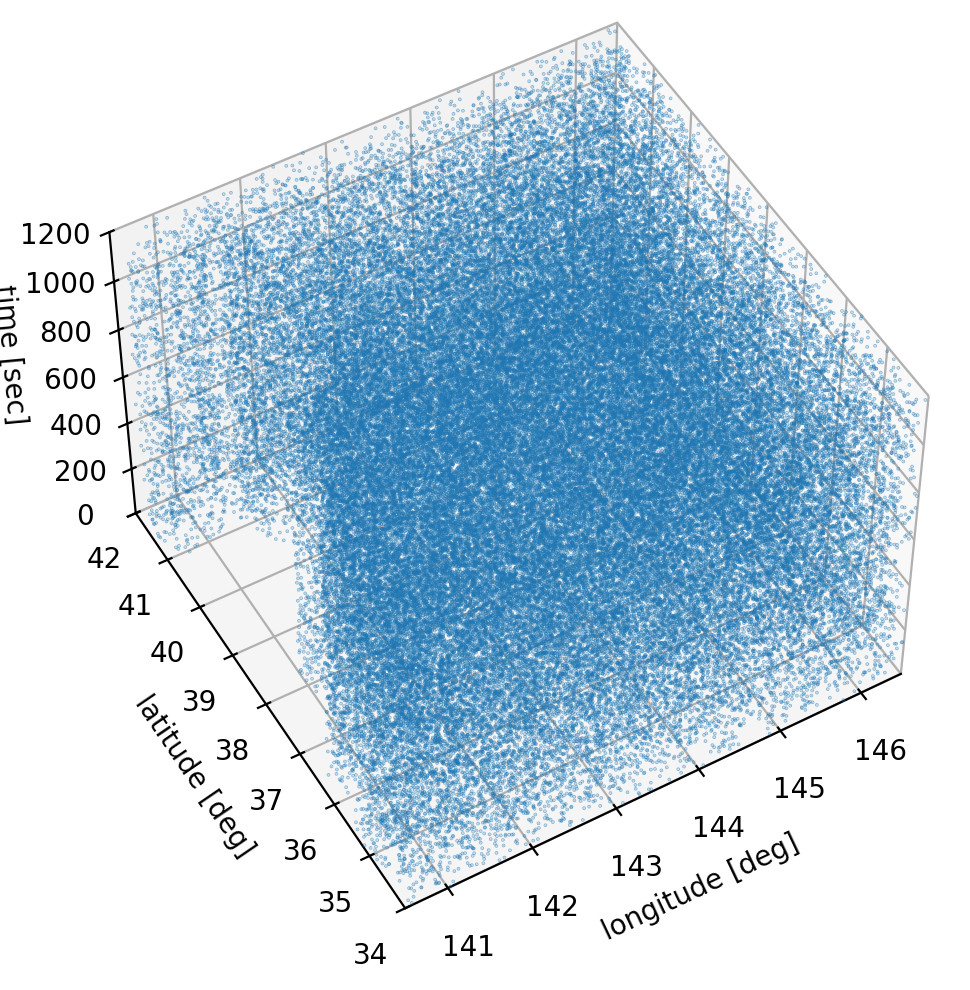

In [ ]:
# plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lonlatt_cols[:, 0], lonlatt_cols[:, 1], lonlatt_cols[:, 2], s=0.1, alpha=0.5)
ax.set_xlabel('longitude [deg]')
ax.set_ylabel('latitude [deg]')
ax.set_zlabel('time [sec]')
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)
ax.set_zlim(t_min, t_max)
# ax.set_xticks([141, 143, 145])
# ax.set_yticks([35, 37, 39, 41])
ax.view_init(elev=50, azim=240)
# ax.set_title("Collocation Points")
plt.tight_layout()
plt.savefig("Collocation_Points_3D.png", bbox_inches='tight')